<a href="https://colab.research.google.com/github/BryanVelazco03/Analisis-RFM/blob/main/Segmentaci%C3%B3n_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis RFM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
data = pd.read_csv('rfm_clientes_tran.csv')

In [ ]:
data.head(5)

,IdCliente,LineaProducto,NumeroProducto,Fecha,Monto
0,1,D-400,487,7/24/2004,118
1,1,D-400,496,7/24/2004,136
2,1,C-300,305,10/25/2004,50
3,1,D-400,438,8/4/2005,129
4,1,C-300,395,9/4/2006,52


In [ ]:
data.loc[2:4,['Fecha']]

,Fecha
2,10/25/2004
3,8/4/2005
4,9/4/2006


In [ ]:
data['Fecha'].head(5)

,Fecha
0,7/24/2004
1,7/24/2004
2,10/25/2004
3,8/4/2005
4,9/4/2006


In [ ]:
data['Fecha'] = pd.to_datetime(data['Fecha'])

In [ ]:
data['Fecha'].head(5)

,Fecha
0,2004-07-24
1,2004-07-24
2,2004-10-25
3,2005-08-04
4,2006-09-04


In [ ]:
data.head(5)

,IdCliente,LineaProducto,NumeroProducto,Fecha,Monto
0,1,D-400,487,2004-07-24,118
1,1,D-400,496,2004-07-24,136
2,1,C-300,305,2004-10-25,50
3,1,D-400,438,2005-08-04,129
4,1,C-300,395,2006-09-04,52


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   IdCliente       4905 non-null   int64         
 1   LineaProducto   4905 non-null   object        
 2   NumeroProducto  4905 non-null   int64         
 3   Fecha           4905 non-null   datetime64[ns]
 4   Monto           4905 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 191.7+ KB


In [ ]:
print(data['Fecha'].min(), data['Fecha'].max())

2004-01-02 00:00:00 2006-12-30 00:00:00


In [ ]:
data['Hoy'] = dt.date(2006,12,31)

In [ ]:
data.head(5)

,IdCliente,LineaProducto,NumeroProducto,Fecha,Monto,Hoy
0,1,D-400,487,2004-07-24,118,2006-12-31
1,1,D-400,496,2004-07-24,136,2006-12-31
2,1,C-300,305,2004-10-25,50,2006-12-31
3,1,D-400,438,2005-08-04,129,2006-12-31
4,1,C-300,395,2006-09-04,52,2006-12-31


In [ ]:
recencia_df = data.groupby(by='IdCliente', as_index=False)['Fecha'].max()
recencia_df.columns = ['IdCliente','Fecha']
recencia_df.head()

,IdCliente,Fecha
0,1,2006-09-04
1,2,2005-11-10
2,3,2005-06-04
3,4,2006-08-18
4,5,2006-07-07


In [ ]:
recencia_df['Hoy'] = dt.date(2006,12,31)
recencia_df['Hoy'] = pd.to_datetime(recencia_df['Hoy'])

In [ ]:
recencia_df.head()

,IdCliente,Fecha,Hoy
0,1,2006-09-04,2006-12-31
1,2,2005-11-10,2006-12-31
2,3,2005-06-04,2006-12-31
3,4,2006-08-18,2006-12-31
4,5,2006-07-07,2006-12-31


In [ ]:
recencia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   IdCliente  995 non-null    int64         
 1   Fecha      995 non-null    datetime64[ns]
 2   Hoy        995 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 23.4 KB


In [ ]:
#calculate recency
recencia_df['Recencia'] = recencia_df['Hoy'] - recencia_df['Fecha']
recencia_df.head()

,IdCliente,Fecha,Hoy,Recencia
0,1,2006-09-04,2006-12-31,118 days
1,2,2005-11-10,2006-12-31,416 days
2,3,2005-06-04,2006-12-31,575 days
3,4,2006-08-18,2006-12-31,135 days
4,5,2006-07-07,2006-12-31,177 days


In [ ]:
recencia_df['Recencia'] = recencia_df['Recencia']/np.timedelta64(1, 'D')

In [ ]:
recencia_df.head()

,IdCliente,Fecha,Hoy,Recencia
0,1,2006-09-04,2006-12-31,118.0
1,2,2005-11-10,2006-12-31,416.0
2,3,2005-06-04,2006-12-31,575.0
3,4,2006-08-18,2006-12-31,135.0
4,5,2006-07-07,2006-12-31,177.0


In [ ]:
#calculate frequency
frecuencia_df = data.groupby(by='IdCliente', as_index=False)['Fecha'].count()
frecuencia_df.columns = ['IdCliente','Frecuencia']
frecuencia_df.head()

,IdCliente,Frecuencia
0,1,5
1,2,4
2,3,2
3,4,7
4,5,3


In [ ]:
#calculate money
monto_df = data.groupby(by='IdCliente', as_index=False)['Monto'].sum()
monto_df.columns = ['IdCliente','Monto']
monto_df.head()

,IdCliente,Monto
0,1,485
1,2,350
2,3,233
3,4,936
4,5,359


In [ ]:
#Create RFM Table
temp_df = recencia_df.merge(frecuencia_df,on='IdCliente')
rfm_df = temp_df.merge(monto_df,on='IdCliente')
rfm_df.head()

,IdCliente,Fecha,Hoy,Recencia,Frecuencia,Monto
0,1,2006-09-04,2006-12-31,118.0,5,485
1,2,2005-11-10,2006-12-31,416.0,4,350
2,3,2005-06-04,2006-12-31,575.0,2,233
3,4,2006-08-18,2006-12-31,135.0,7,936
4,5,2006-07-07,2006-12-31,177.0,3,359


In [ ]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,IdCliente,Fecha,Hoy,Recencia,Frecuencia,Monto
0.25,251.5,2005-10-11 12:00:00,2006-12-31,132.0,3.0,284.5
0.50,500.0,2006-05-16 00:00:00,2006-12-31,229.0,5.0,436.0
0.75,748.5,2006-08-21 00:00:00,2006-12-31,445.5,6.0,620.0


In [ ]:
quantiles.to_dict()

{'IdCliente': {0.25: 251.5, 0.5: 500.0, 0.75: 748.5},
 'Fecha': {0.25: Timestamp('2005-10-11 12:00:00'),
  0.5: Timestamp('2006-05-16 00:00:00'),
  0.75: Timestamp('2006-08-21 00:00:00')},
 'Hoy': {0.25: Timestamp('2006-12-31 00:00:00'),
  0.5: Timestamp('2006-12-31 00:00:00'),
  0.75: Timestamp('2006-12-31 00:00:00')},
 'Recencia': {0.25: 132.0, 0.5: 229.0, 0.75: 445.5},
 'Frecuencia': {0.25: 3.0, 0.5: 5.0, 0.75: 6.0},
 'Monto': {0.25: 284.5, 0.5: 436.0, 0.75: 620.0}}

In [ ]:
#Creación de Segmentos
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [ ]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recencia'].apply(RScore, args=('Recencia',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frecuencia'].apply(FMScore, args=('Frecuencia',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monto'].apply(FMScore, args=('Monto',quantiles,))

In [ ]:
rfm_segmentation.head()

,IdCliente,Fecha,Hoy,Recencia,Frecuencia,Monto,R_Quartile,F_Quartile,M_Quartile
0,1,2006-09-04,2006-12-31,118.0,5,485,4,2,3
1,2,2005-11-10,2006-12-31,416.0,4,350,2,2,2
2,3,2005-06-04,2006-12-31,575.0,2,233,1,1,1
3,4,2006-08-18,2006-12-31,135.0,7,936,3,4,4
4,5,2006-07-07,2006-12-31,177.0,3,359,3,1,2


In [ ]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) + rfm_segmentation.F_Quartile.map(str) + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,IdCliente,Fecha,Hoy,Recencia,Frecuencia,Monto,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,1,2006-09-04,2006-12-31,118.0,5,485,4,2,3,423
1,2,2005-11-10,2006-12-31,416.0,4,350,2,2,2,222
2,3,2005-06-04,2006-12-31,575.0,2,233,1,1,1,111
3,4,2006-08-18,2006-12-31,135.0,7,936,3,4,4,344
4,5,2006-07-07,2006-12-31,177.0,3,359,3,1,2,312


In [ ]:
rfm_segmentation.dtypes

,0
IdCliente,int64
Fecha,datetime64[ns]
Hoy,datetime64[ns]
Recencia,float64
Frecuencia,int64
Monto,int64
R_Quartile,int64
F_Quartile,int64
M_Quartile,int64
RFMScore,object


In [ ]:
  # Función para clasificar en segmentos según R, F y M
def classify_segment(row):
    r, f, m = row['R_Quartile'], row['F_Quartile'], row['M_Quartile']

    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 2 and 3 <= f <= 5 and 3 <= m <= 5:
        return 'Loyal Customers'
    elif 3 <= r <= 5 and 1 <= f <= 3 and 1 <= m <= 3:
        return 'Potential Loyalist'
    elif r >= 4 and f <= 1 and m <= 1:
        return 'New Customers'
    elif 3 <= r <= 4 and f <= 1 and m <= 1:
        return 'Promising'
    elif 2 <= r <= 3 and 2 <= f <= 3 and 2 <= m <= 3:
        return 'Need Attention'
    elif 2 <= r <= 3 and f <= 2 and m <= 2:
        return 'About To Sleep'
    elif r <= 2 and 2 <= f <= 5 and 2 <= m <= 5:
        return 'At Risk'
    elif r <= 1 and f >= 4 and m >= 4:
        return "Can't Lose Them"
    elif 1 <= r <= 2 and 1 <= f <= 2 and 1 <= m <= 2:
        return 'Hibernating'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Lost'
    else:
        return 'Unclassified'

# Crear la columna 'Segment' aplicando la función
rfm_segmentation['Segment'] = rfm_segmentation.apply(classify_segment, axis=1)

# Visualizar el DataFrame con la nueva columna
rfm_segmentation.head()

,IdCliente,Fecha,Hoy,Recencia,Frecuencia,Monto,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
0,1,2006-09-04,2006-12-31,118.0,5,485,4,2,3,423,Potential Loyalist
1,2,2005-11-10,2006-12-31,416.0,4,350,2,2,2,222,Need Attention
2,3,2005-06-04,2006-12-31,575.0,2,233,1,1,1,111,Hibernating
3,4,2006-08-18,2006-12-31,135.0,7,936,3,4,4,344,Loyal Customers
4,5,2006-07-07,2006-12-31,177.0,3,359,3,1,2,312,Potential Loyalist


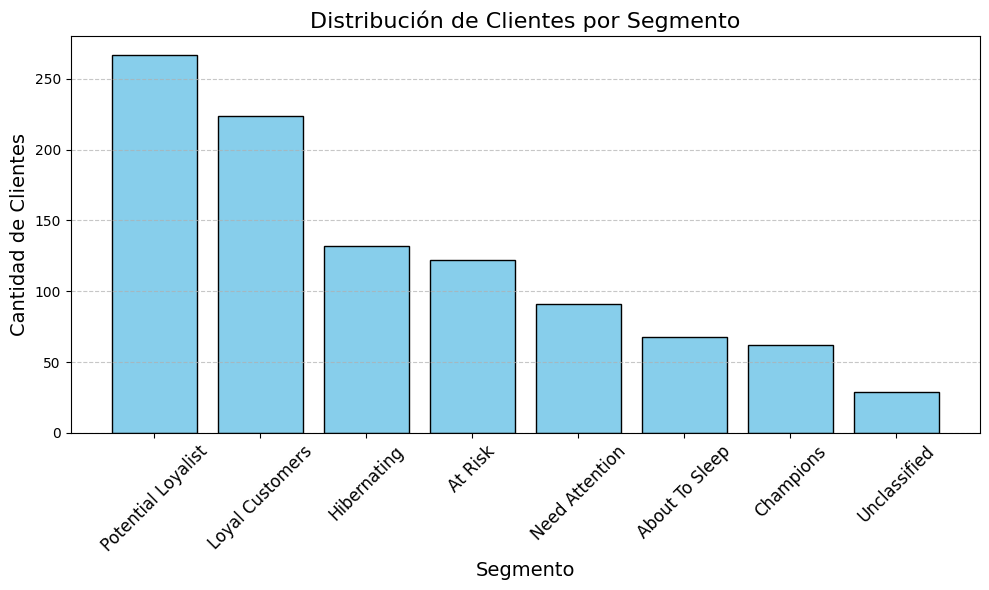

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de clientes en cada segmento
segment_counts = rfm_segmentation['Segment'].value_counts()

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(segment_counts.index, segment_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribución de Clientes por Segmento', fontsize=16)
plt.xlabel('Segmento', fontsize=14)
plt.ylabel('Cantidad de Clientes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el histograma
plt.show()


### Gráfico de Distribución de Puntajes RFM

Este gráfico es útil si tienes una columna de puntajes categóricos, como RFMScore, y quieres ver la cantidad de clientes en cada segmento.

<ipython-input-107-a58bf36f286f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'RFMScore', data = rfm_segmentation, palette='viridis')


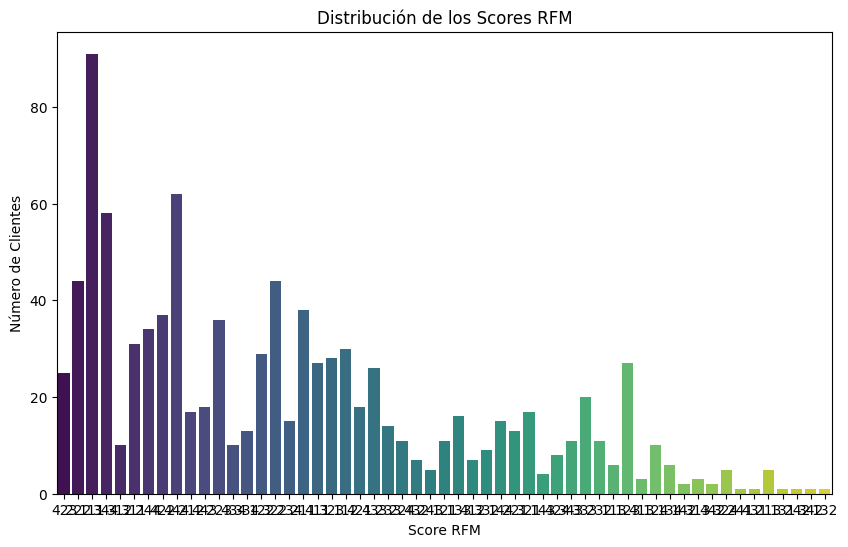

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'RFMScore', data = rfm_segmentation, palette='viridis')
plt.title('Distribución de los Scores RFM')
plt.xlabel('Score RFM')
plt.ylabel('Número de Clientes')
plt.show()

### Gráfico de Frecuencia de cada Métrica de RFM

Muestra la distribución de cada componente de RFM (Recencia, Frecuencia, Valor Monetario) individualmente mediante un gráfico de histograma.

#### Gráfico de Histograma para Recencia

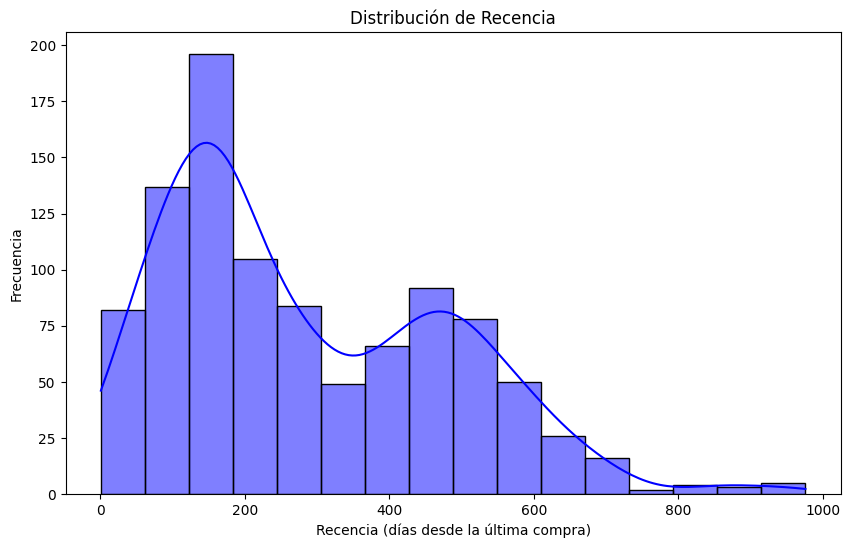

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(rfm_segmentation['Recencia'], kde=True, color='blue')
plt.title('Distribución de Recencia')
plt.xlabel('Recencia (días desde la última compra)')
plt.ylabel('Frecuencia')
plt.show()

#### Gráfico de Histograma para Frecuencia

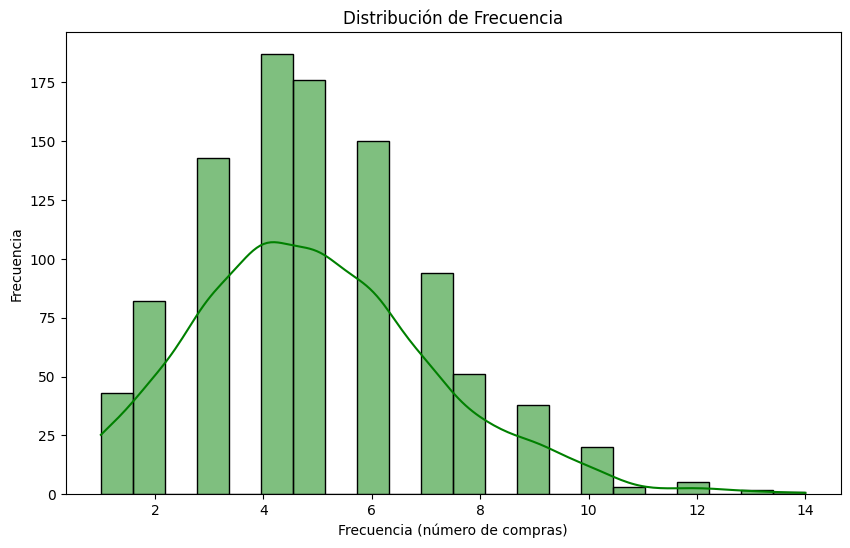

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(rfm_segmentation['Frecuencia'], kde=True, color='green')
plt.title('Distribución de Frecuencia')
plt.xlabel('Frecuencia (número de compras)')
plt.ylabel('Frecuencia')
plt.show()

#### Gráfico de Histograma para Valor Monetario

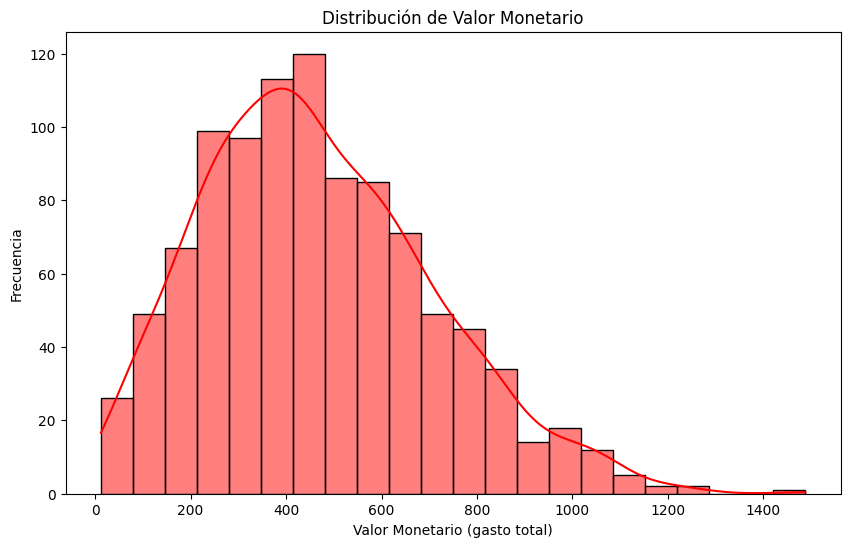

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(rfm_segmentation['Monto'], kde=True, color='red')
plt.title('Distribución de Valor Monetario')
plt.xlabel('Valor Monetario (gasto total)')
plt.ylabel('Frecuencia')
plt.show()

### Correlación entre Recencia, Frecuencia y Valor Monetario

Muestra cómo se correlacionan las tres métricas entre sí. Esto es útil para comprender las relaciones entre recencia, frecuencia y valor monetario.

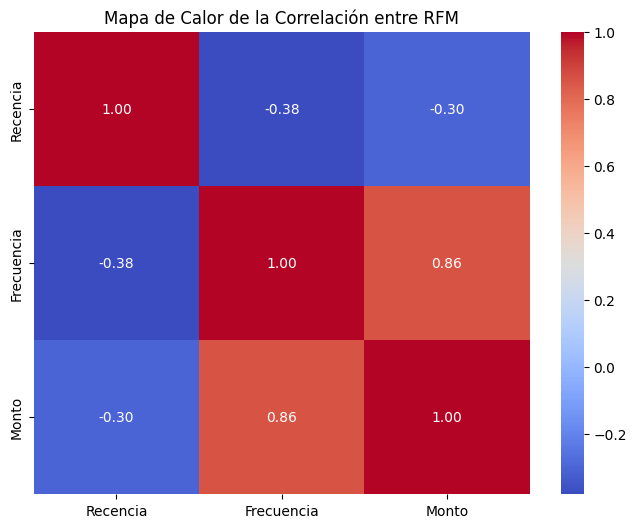

In [ ]:
correlation_matrix = rfm_segmentation[['Recencia', 'Frecuencia', 'Monto']].corr()

# Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de la Correlación entre RFM')
plt.show()

### Cantidad de clientes por segmento

In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))

Best Customers:  62


In [ ]:
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))

Loyal Customers:  214


In [ ]:
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))


Big Spenders:  247


In [ ]:
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))

Almost Lost:  34


In [ ]:
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))

Lost Customers:  15


In [ ]:
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Lost Cheap Customers:  91
